# Importing Libraries

Run the following lines of codes before starting using plotly, quandl, yfinance libraries: 

- <code> !pip install quandl </code>
- <code> !pip install plotly </code>
- <code> !pip install pandas_datareader </code>

In [1]:
import pandas as pd
from pandas_datareader import data #will be used to download data from yahoo finance
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl

#plotly
from plotly.offline import iplot
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go #the basic charts that we will use are mainly stored under graph_objs
init_notebook_mode(connected=True)

# Quandl

**Quandl** is a marketplace for financial, economic and alternative data delivered in modern formats for today's analysts, including Python, Excel, Matlab, R.

Gettting data from quandl:

- Check available data in quandl webpage (https://www.quandl.com/), 
- Write the code in JN with the following logic: "Source of Data" then  put "/" then name of a measure (in the example below stock name is MSFT) that you want to download

In [2]:
msft=quandl.get("Wiki/MSFT")

In [3]:
#let's look at mean and max closing prices
print("Mean: ",round(msft.Close.mean(),1))
print("Max: ",round(msft.Close.max(),1))

Mean:  59.9
Max:  179.9


In [4]:
msft=quandl.get("Wiki/MSFT", 
                authtoken="a-ycygX1AtQCZexCc4a5", #you should put your key
                start_date='1991-12-31',end_date='2019-12-31', #define time period
                collapse='daily', #define frequency, can be annual, monthly
                order='desc')

Use <code>?quandl.get</code> to learn more about quandl parameters when importing data.

In [5]:
#let's look at data
msft.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-27,94.940,95.139,88.51,89.47,53704562.0,0.0,1.0,94.940,95.139,88.51,89.47,53704562.0
2018-03-26,90.610,94.000,90.40,93.78,55031149.0,0.0,1.0,90.610,94.000,90.40,93.78,55031149.0
2018-03-23,89.500,90.460,87.08,87.18,42159397.0,0.0,1.0,89.500,90.460,87.08,87.18,42159397.0
2018-03-22,91.265,91.750,89.66,89.79,37578166.0,0.0,1.0,91.265,91.750,89.66,89.79,37578166.0
2018-03-21,92.930,94.050,92.21,92.48,23753263.0,0.0,1.0,92.930,94.050,92.21,92.48,23753263.0


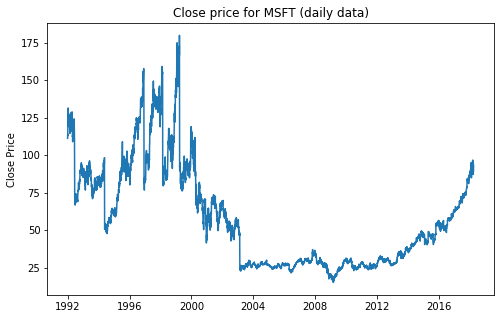

In [6]:
#let's visualise change of Closing price by time
plt.figure(figsize=(8,5))
plt.plot(msft.index,msft.Close)

plt.title("Close price for MSFT (daily data)")
plt.ylabel("Close Price")

plt.show()

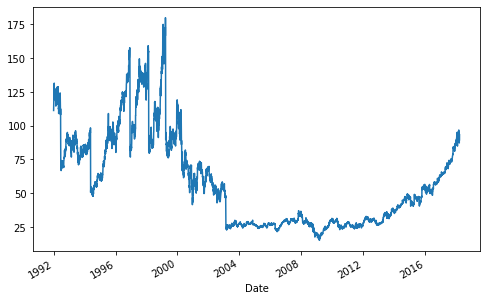

In [7]:
#Another way of plotting historical data directly from pandas
msft.Close.plot(figsize=(8,5))
plt.show()

# Data from Yahoo Finance

There’re some limitations by making the call to Yahoo Finance API:

- Using the Public API, you are limited to 2,000 requests per hour per IP (or up to a total of 48,000 requests a day).

- When importing many tickers, use **<code>time.sleep(1)</code>** (python time module) function to avoid your IP getting blocked

In [8]:
# look at the documentation of DataReader
#?data.DataReader

In [9]:
#let's import Walt Disney's (DIS) stock price from Yahoo Finance
# User pandas_reader.data.DataReader
disney=data.DataReader(name="DIS",
                       data_source='yahoo', #you can also use "google" to download data from google finance
                       start='2020-01-01', end="2020-07-15" #define time period
                      )

In [10]:
disney.sort_index(ascending=False).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-15,122.089996,119.699997,121.629997,120.900002,15306000,120.900002
2020-07-14,119.080002,114.540001,115.230003,118.660004,12425100,118.660004
2020-07-13,120.129997,115.889999,119.940002,116.220001,15620200,116.220001
2020-07-10,119.440002,116.209999,116.830002,119.339996,14207900,119.339996
2020-07-09,117.849998,115.379997,116.510002,116.809998,13582900,116.809998


In [11]:
#let's look at set_style() documentation
# ?sns.set_style

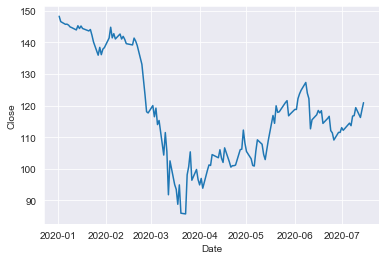

In [12]:
#let's use seaborn lineplot() function to visualise time series data
sns.set_style('darkgrid')

sns.lineplot(disney.index,disney.Close)
plt.show()

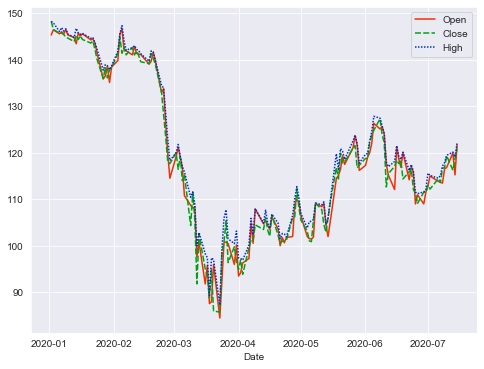

In [13]:
#let's compare open, close, high
plt.figure(figsize=(8,6))

sns.lineplot(data=disney[["Open","Close","High"]], 
             palette=['#f22e02','#00a110','#002fc9'] #for better looking chart
            )

plt.show()

In [14]:
#let's import another stock for the same time period of disney
aapl=data.DataReader(name="AAPL",
                       data_source='yahoo', #you can also use "google" to download data from google finance
                      start='2020-01-01', end="2020-07-15")

In [15]:
#let's look at head of data
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,300.600006,295.190002,296.239990,300.350006,33870100.0,298.829956
2020-01-03,300.579987,296.500000,297.149994,297.429993,36580700.0,295.924713
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,298.282715
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,296.879883
2020-01-08,304.440002,297.160004,297.160004,303.190002,33019800.0,301.655548


In [16]:
#let's look at head of data
disney.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,148.199997,145.100006,145.289993,148.199997,9502100,148.199997
2020-01-03,147.899994,146.050003,146.399994,146.500000,7320200,146.500000
2020-01-06,146.029999,144.309998,145.539993,145.649994,8262500,145.649994
2020-01-07,146.869995,145.419998,145.990005,145.699997,6906500,145.699997
2020-01-08,146.130005,144.820007,145.490005,145.399994,6984200,145.399994


In [17]:
#now let's join two data
aapl_dis=disney.join(aapl, #data that will be joined
                     how='right', #you can use "outer", "left",etc
                     lsuffix='_dis', #let's add the elf columns suffix '_dis'
                     rsuffix='_aapl' #let's add the elf columns suffix '_aapl'
                    )

In [18]:
#let's look at the head of data
aapl_dis.head()

,High_dis,Low_dis,Open_dis,Close_dis,Volume_dis,Adj Close_dis,High_aapl,Low_aapl,Open_aapl,Close_aapl,Volume_aapl,Adj Close_aapl
Date,,,,,,,,,,,,
2020-01-02,148.199997,145.100006,145.289993,148.199997,9502100,148.199997,300.600006,295.190002,296.239990,300.350006,33870100.0,298.829956
2020-01-03,147.899994,146.050003,146.399994,146.500000,7320200,146.500000,300.579987,296.500000,297.149994,297.429993,36580700.0,295.924713
2020-01-06,146.029999,144.309998,145.539993,145.649994,8262500,145.649994,299.959991,292.750000,293.790009,299.799988,29596800.0,298.282715
2020-01-07,146.869995,145.419998,145.990005,145.699997,6906500,145.699997,300.899994,297.480011,299.839996,298.390015,27218000.0,296.879883
2020-01-08,146.130005,144.820007,145.490005,145.399994,6984200,145.399994,304.440002,297.160004,297.160004,303.190002,33019800.0,301.655548


In [19]:
#now let's download several stocks with one code so that we don't merge data after downloading
tickers=["DIS","AAPL","MSFT",'AMZN']

df_stocks=data.DataReader(name=tickers,
                          data_source='yahoo',
                         start='2020-01-01')
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 136 entries, 2020-01-02 to 2020-07-16
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, DIS)   136 non-null    float64
 1   (Adj Close, AAPL)  136 non-null    float64
 2   (Adj Close, MSFT)  136 non-null    float64
 3   (Adj Close, AMZN)  136 non-null    float64
 4   (Close, DIS)       136 non-null    float64
 5   (Close, AAPL)      136 non-null    float64
 6   (Close, MSFT)      136 non-null    float64
 7   (Close, AMZN)      136 non-null    float64
 8   (High, DIS)        136 non-null    float64
 9   (High, AAPL)       136 non-null    float64
 10  (High, MSFT)       136 non-null    float64
 11  (High, AMZN)       136 non-null    float64
 12  (Low, DIS)         136 non-null    float64
 13  (Low, AAPL)        136 non-null    float64
 14  (Low, MSFT)        136 non-null    float64
 15  (Low, AMZN)        136 non-null    float64
 16  (Open, 

In [20]:
#MultiIndex type 
df_stocks.columns

MultiIndex([('Adj Close',  'DIS'),
            ('Adj Close', 'AAPL'),
            ('Adj Close', 'MSFT'),
            ('Adj Close', 'AMZN'),
            (    'Close',  'DIS'),
            (    'Close', 'AAPL'),
            (    'Close', 'MSFT'),
            (    'Close', 'AMZN'),
            (     'High',  'DIS'),
            (     'High', 'AAPL'),
            (     'High', 'MSFT'),
            (     'High', 'AMZN'),
            (      'Low',  'DIS'),
            (      'Low', 'AAPL'),
            (      'Low', 'MSFT'),
            (      'Low', 'AMZN'),
            (     'Open',  'DIS'),
            (     'Open', 'AAPL'),
            (     'Open', 'MSFT'),
            (     'Open', 'AMZN'),
            (   'Volume',  'DIS'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'MSFT'),
            (   'Volume', 'AMZN')],
           names=['Attributes', 'Symbols'])

In [21]:
#The map() function calls the specified function for each item of an iterable 
        ###(such as string, list, tuple or dictionary) and returns a list of results.
df_stocks.columns=df_stocks.columns.map('_'.join)
df_stocks.columns

Index(['Adj Close_DIS', 'Adj Close_AAPL', 'Adj Close_MSFT', 'Adj Close_AMZN',
       'Close_DIS', 'Close_AAPL', 'Close_MSFT', 'Close_AMZN', 'High_DIS',
       'High_AAPL', 'High_MSFT', 'High_AMZN', 'Low_DIS', 'Low_AAPL',
       'Low_MSFT', 'Low_AMZN', 'Open_DIS', 'Open_AAPL', 'Open_MSFT',
       'Open_AMZN', 'Volume_DIS', 'Volume_AAPL', 'Volume_MSFT', 'Volume_AMZN'],
      dtype='object')

In [22]:
#let's look at data with new column names
df_stocks.head()

,Adj Close_DIS,Adj Close_AAPL,Adj Close_MSFT,Adj Close_AMZN,Close_DIS,Close_AAPL,Close_MSFT,Close_AMZN,High_DIS,High_AAPL,...,Low_MSFT,Low_AMZN,Open_DIS,Open_AAPL,Open_MSFT,Open_AMZN,Volume_DIS,Volume_AAPL,Volume_MSFT,Volume_AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,148.199997,298.829956,159.737595,1898.010010,148.199997,300.350006,160.619995,1898.010010,148.199997,300.600006,...,158.330002,1864.150024,145.289993,296.239990,158.779999,1875.000000,9502100.0,33870100.0,22622100.0,4029000.0
2020-01-03,146.500000,295.924713,157.748581,1874.969971,146.500000,297.429993,158.619995,1874.969971,147.899994,300.579987,...,158.059998,1864.500000,146.399994,297.149994,158.320007,1864.500000,7320200.0,36580700.0,21116200.0,3764400.0
2020-01-06,145.649994,298.282715,158.156342,1902.880005,145.649994,299.799988,159.029999,1902.880005,146.029999,299.959991,...,156.509995,1860.000000,145.539993,293.790009,157.080002,1860.000000,8262500.0,29596800.0,20813700.0,4061800.0
2020-01-07,145.699997,296.879883,156.714310,1906.859985,145.699997,298.390015,157.580002,1906.859985,146.869995,300.899994,...,157.320007,1892.040039,145.990005,299.839996,159.320007,1904.500000,6906500.0,27218000.0,21634100.0,4044900.0
2020-01-08,145.399994,301.655548,159.210495,1891.969971,145.399994,303.190002,160.089996,1891.969971,146.130005,304.440002,...,157.949997,1886.439941,145.490005,297.160004,158.929993,1898.040039,6984200.0,33019800.0,27746500.0,3508000.0


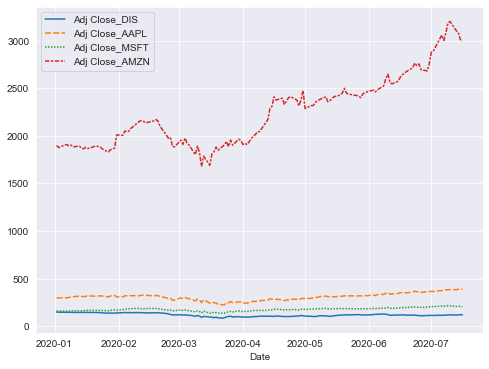

In [23]:
#let's compare different stock close prices
plt.figure(figsize=(8,6))

sns.lineplot(data=df_stocks[['Adj Close_DIS', 
                             'Adj Close_AAPL', 
                             'Adj Close_MSFT', 
                             'Adj Close_AMZN']], 
             palette='tab10' #for better looking chart
            )

plt.show()

# Plotly

The plotly Python library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.

Built on top of the Plotly JavaScript library (plotly.js), plotly enables Python users to create beautiful interactive web-based visualizations that can be displayed in Jupyter notebooks, saved to standalone HTML files, or served as part of pure Python-built web applications using Dash. The plotly Python library is sometimes referred to as "plotly.py" to differentiate it from the JavaScript library.

In Jupyter Notebook you can plot in Plotly via different ways:

- Online
    
    - Inside JupyterNotebook (<code>from plotly.plotly import iplot</code>)
    
    - Not in JupyterNotebook (<code>from plotly.plotly import plot</code>)

- Offline
    - **Inside JupyterNotebook** (<code>from plotly.offline import iplot</code>)
    - Not in JupyterNotebook (<code>from plotly.offline import plot</code>)
    
In case of plotting inside the Notebook (using iplot), the following line of code must be executed, to show the plot inline:
- <code>from plotly.offline import init_notebook_mode</code>
- <code>init_notebook_mode(connected=True)</code>

Use <code>go.Scatter()</code> function to plot the data.

In [24]:
#first, create a data that plotly will understand
data_chart=go.Scatter(x=aapl.index,y=aapl.Close,
                     mode='lines')

Use <code>go.Figure()</code> function to visualise created data: data_chart

In [25]:
#let's visualise the data_chart
fig=go.Figure(data_chart) #to draw the chart

fig.show() #to show the chart

In [26]:
#you can use go.Scatter() inside go.Figure()
fig=go.Figure(go.Scatter(x=disney.index,y=disney.Close,
                     mode='lines'))
fig.update_layout(
    title='Disney Stock Price',
    height=400)
fig.show()

In [27]:
#use add_trace() to visualise different time series on one chart
fig=go.Figure()

fig.add_trace(go.Scatter(x=df_stocks.index,
                        y=df_stocks.Close_AMZN,
                        mode='lines',
                        name='AMZN'))
fig.add_trace(go.Scatter(x=df_stocks.index,
                        y=df_stocks.Close_MSFT,
                        mode='lines',
                        name='MSFT'))
fig.add_trace(go.Scatter(x=df_stocks.index,
                        y=df_stocks.Close_AAPL,
                        mode='lines',
                        name='AAPL'))
fig.add_trace(go.Scatter(x=df_stocks.index,
                        y=df_stocks.Close_DIS,
                        mode='lines',
                        name='DIS'))
fig.update_layout(
    title='Comparison between stocks')

fig.show()


In [28]:
#use go.Candlestick() to create candlestick chart
data_cand = go.Candlestick(x=df_stocks.index,
                open=df_stocks.Open_AMZN,
                high=df_stocks.High_AMZN,
                low=df_stocks.Low_AMZN,
                close=df_stocks.Close_AMZN,)

In [29]:
# draw the chart
fig_cand=go.Figure(data=data_cand)

fig_cand.update_layout(
    title='Candlestick Chart for AMZN Close Stock Price',
    height=400,
)

fig_cand.show()

In [30]:
fig_cand2=go.Figure(data=go.Candlestick(x=df_stocks.index,
                        open=df_stocks.Open_DIS,
                        close=df_stocks.Close_DIS,
                        low=df_stocks.Low_DIS,
                        high=df_stocks.High_DIS))

fig_cand2.update_layout(
    title='Candlestick Chart for Disney',
    height=800)

fig_cand2.show()